# UAS Project Streamlit: 
- **Nama:** Marutha Wira Yuda
- **Dataset:** https://www.kaggle.com/datasets/ismetgocer/time-spent-bill-amount-data-of-restaurants
- **URL Website:** [Di isi jika web streamlit di upload]

## 1. Menentukan Pertanyaan Bisnis

- Bagaimana variabel-variabel seperti waktu yang dihabiskan, jumlah tagihan, dan faktor-faktor lainnya berhubungan dalam konteks restoran? Apakah ada pola atau tren yang dapat membantu meningkatkan pengalaman pelanggan atau efisiensi operasional?
- Apakah ada faktor tertentu seperti jenis makanan, lokasi meja, atau kondisi cuaca yang secara signifikan mempengaruhi kepuasan pelanggan? Bagaimana variabel-variabel ini dapat dioptimalkan untuk meningkatkan tingkat kepuasan pelanggan?

## 2. Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## 3. Data Wrangling

### 3.1. Gathering Data

In [2]:
df = pd.read_csv("data/restaurant_data.csv")
df.head(3)

,Day,Entry Time,Exit Time,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,17:14,18:56,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,22:13,23:15,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy
2,Sunday,13:02,13:42,Lunch,3,40,34.64,Male,Center,False,1,True,36-45,Sunny


### 3.2. Cleaning Data

In [3]:
df.drop(['Entry Time', 'Exit Time'], axis=1, inplace=True)
df.head(2)

,Day,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy


## 4. Exploratory Data Analysis (EDA)

### 4.1. Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    2000 non-null   object 
 1   Meal Type              2000 non-null   object 
 2   Number of People       2000 non-null   int64  
 3   Time Spent (minutes)   2000 non-null   int64  
 4   Bill Amount ($)        2000 non-null   float64
 5   Gender                 2000 non-null   object 
 6   Table Location         2000 non-null   object 
 7   Reservation            2000 non-null   bool   
 8   Customer Satisfaction  2000 non-null   int64  
 9   Live Music             2000 non-null   bool   
 10  Age Group              2000 non-null   object 
 11  Weather Condition      2000 non-null   object 
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 160.3+ KB


In [5]:
df.head(2)

,Day,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy


### 4.2 Null Check

In [6]:
df.isna().sum()

Day                      0
Meal Type                0
Number of People         0
Time Spent (minutes)     0
Bill Amount ($)          0
Gender                   0
Table Location           0
Reservation              0
Customer Satisfaction    0
Live Music               0
Age Group                0
Weather Condition        0
dtype: int64

### 4.3. Shape

In [7]:
df.shape

(2000, 12)

### 4.4. Unique Value

In [8]:
def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 10
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Day,7,"[Saturday, Friday, Sunday, Tuesday, Monday, We...",object
1,Meal Type,3,"[Dinner, Lunch, Breakfast]",object
2,Number of People,6,"[4, 3, 5, 6, 2, 1]",int64
3,Time Spent (minutes),151,-,int64
4,Bill Amount ($),1849,-,float64
5,Gender,3,"[Female, Male, Other]",object
6,Table Location,3,"[Window, Center, Patio]",object
7,Reservation,2,"[False, True]",bool
8,Customer Satisfaction,5,"[4, 2, 1, 3, 5]",int64
9,Live Music,2,"[False, True]",bool


### 4.5. Column Names

In [9]:
df.columns

Index(['Day', 'Meal Type', 'Number of People', 'Time Spent (minutes)',
       'Bill Amount ($)', 'Gender', 'Table Location', 'Reservation',
       'Customer Satisfaction', 'Live Music', 'Age Group',
       'Weather Condition'],
      dtype='object')

### 4.6. Descriptive Statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of People,2000.0,3.52750,1.709885,1.00,2.0000,4.000,5.00,6.00
Time Spent (minutes),2000.0,104.16350,43.696928,30.00,66.0000,104.000,142.00,180.00
Bill Amount ($),2000.0,100.41142,32.820357,25.12,75.9375,98.685,123.29,205.85
Customer Satisfaction,2000.0,3.00550,1.415440,1.00,2.0000,3.000,4.00,5.00


### 4.7. Correlation

In [11]:
# I selected only numeric columns and I am examining the correlation among them
df.select_dtypes(include=[np.number]).corr()

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction
Number of People,1.000000,-0.014887,0.002103,-0.019182
Time Spent (minutes),-0.014887,1.000000,0.812608,-0.009324
Bill Amount ($),0.002103,0.812608,1.000000,0.231861
Customer Satisfaction,-0.019182,-0.009324,0.231861,1.000000


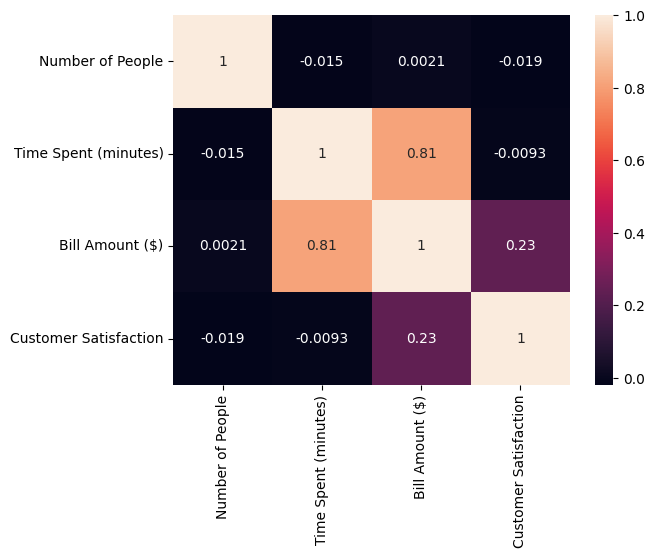

In [12]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot = True);

### 4.8. Pairplot

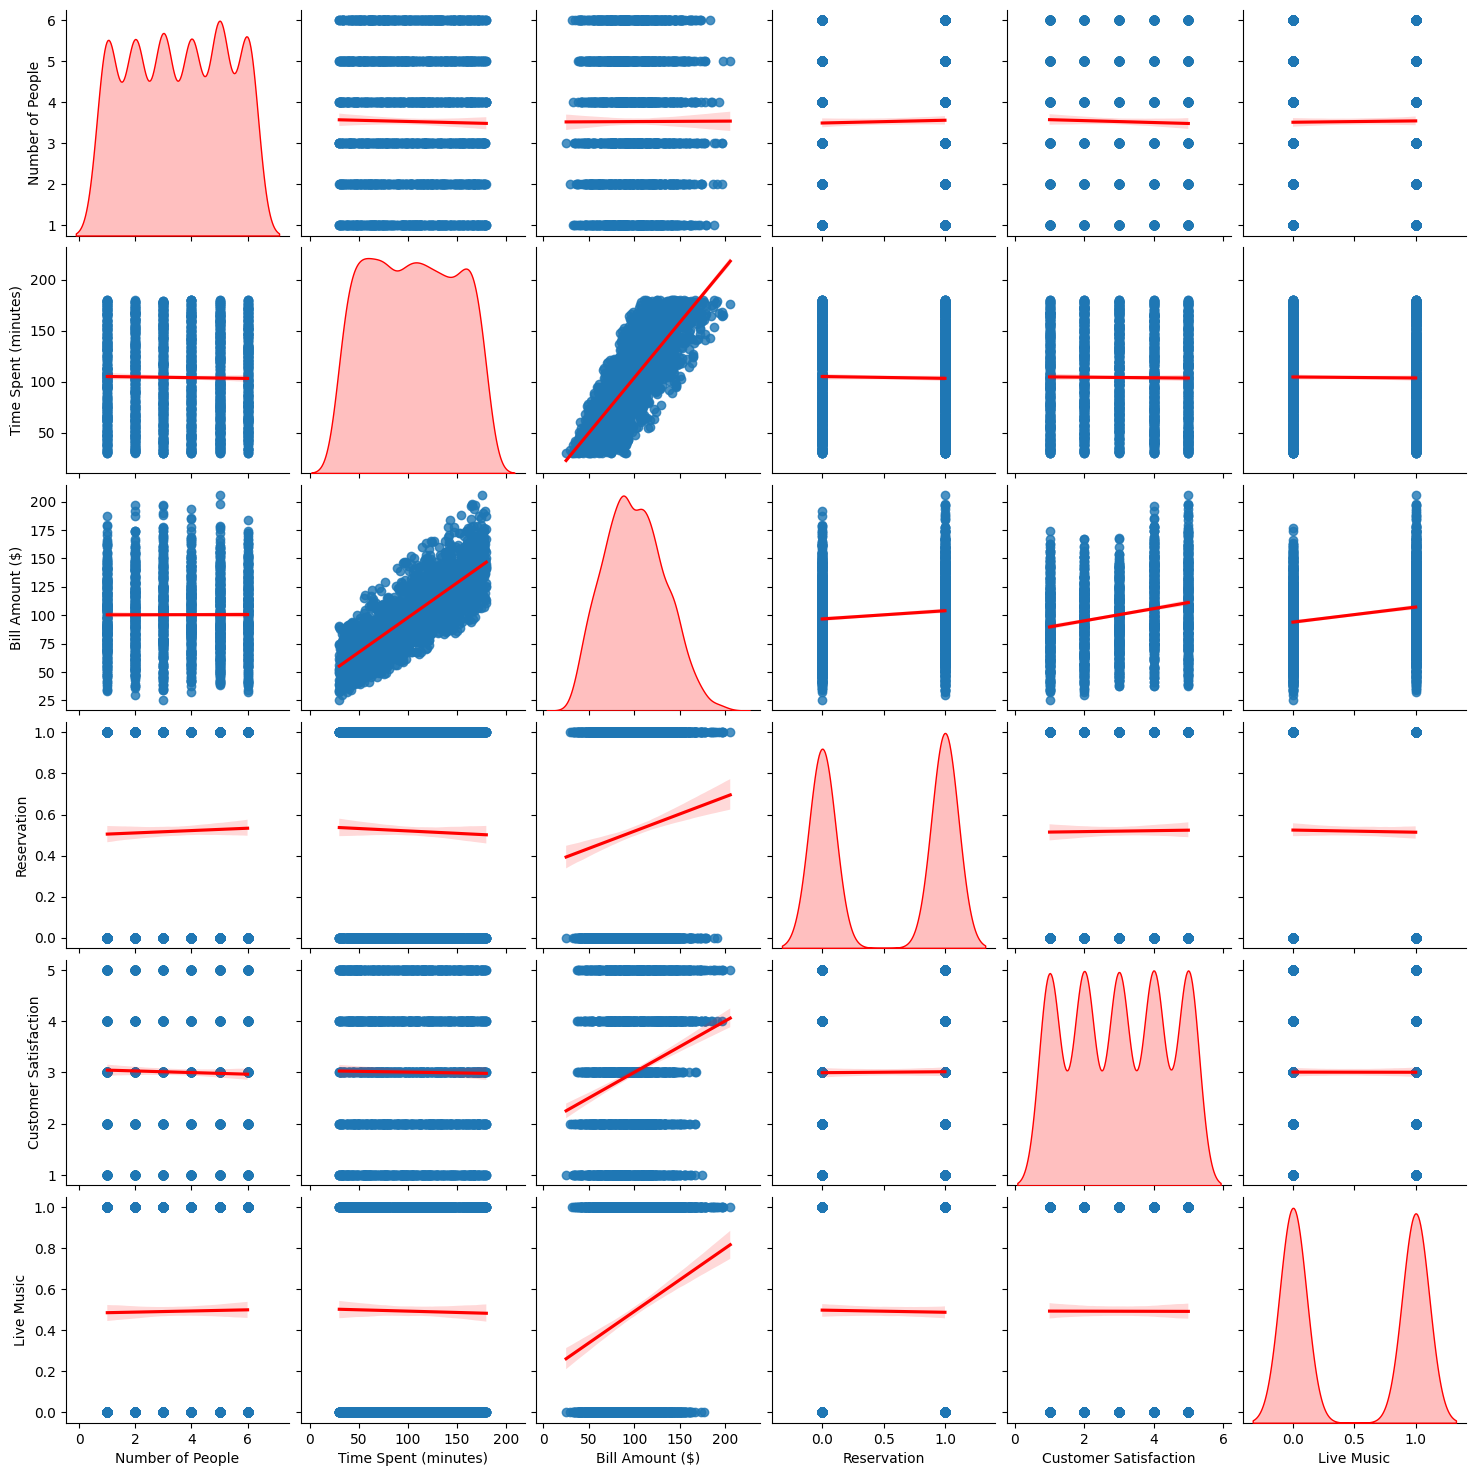

In [13]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

### 4.9. Outliers Check

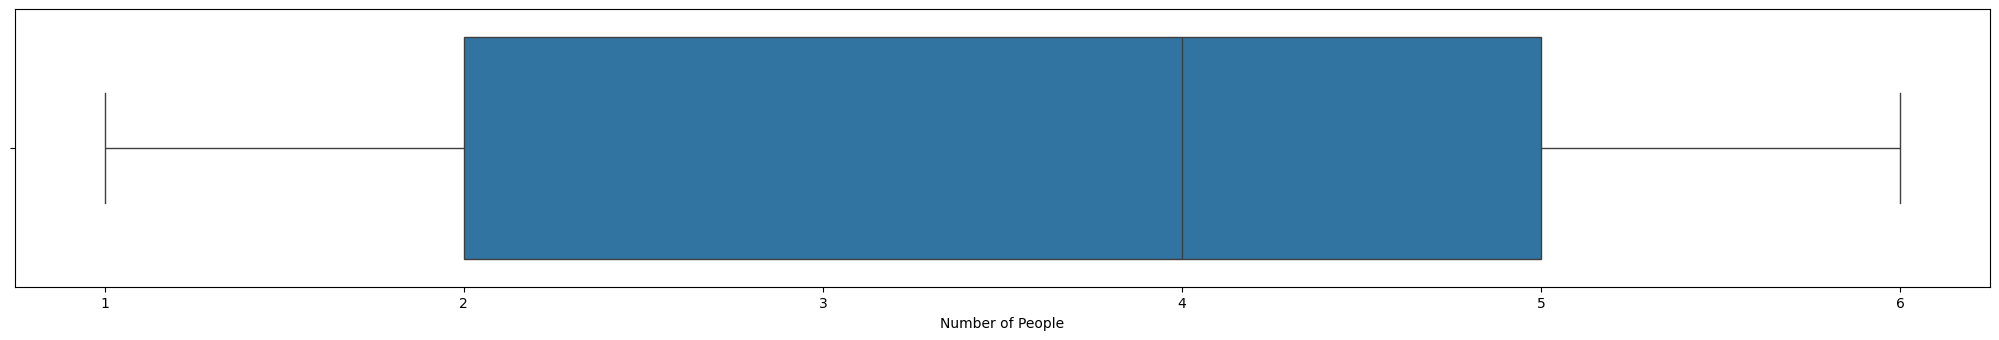

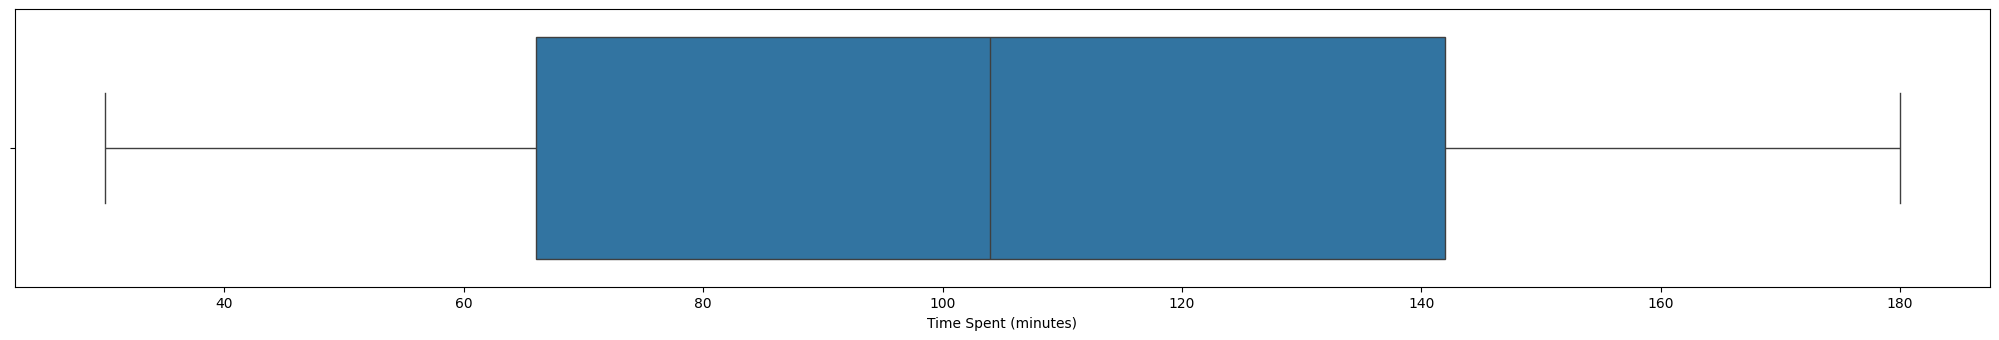

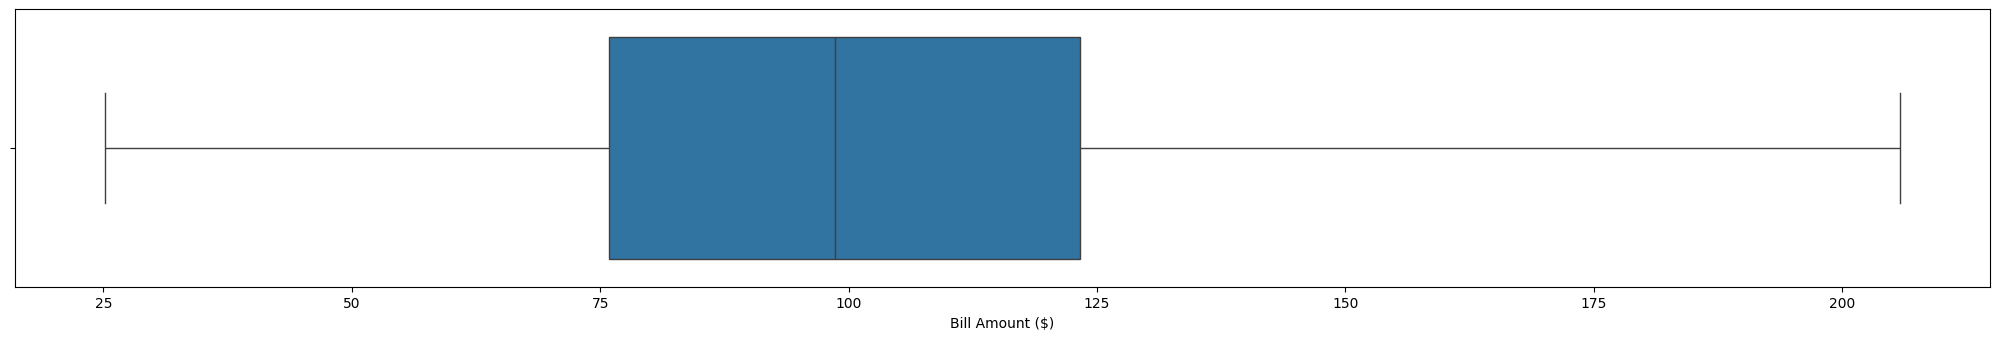

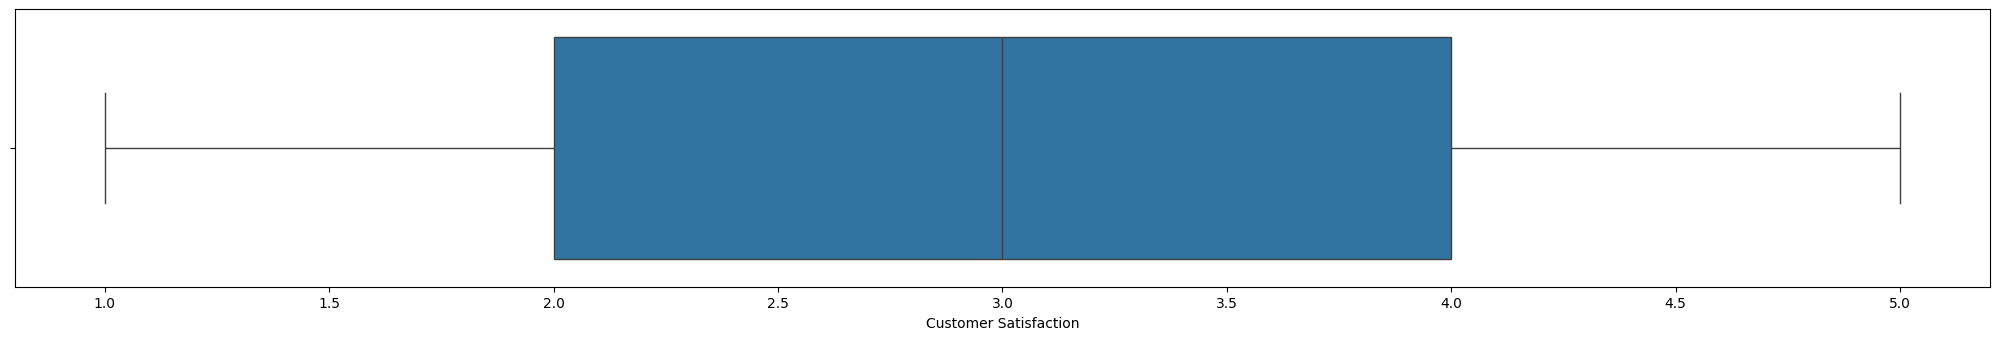

In [14]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

### 4.10. Bar Charts

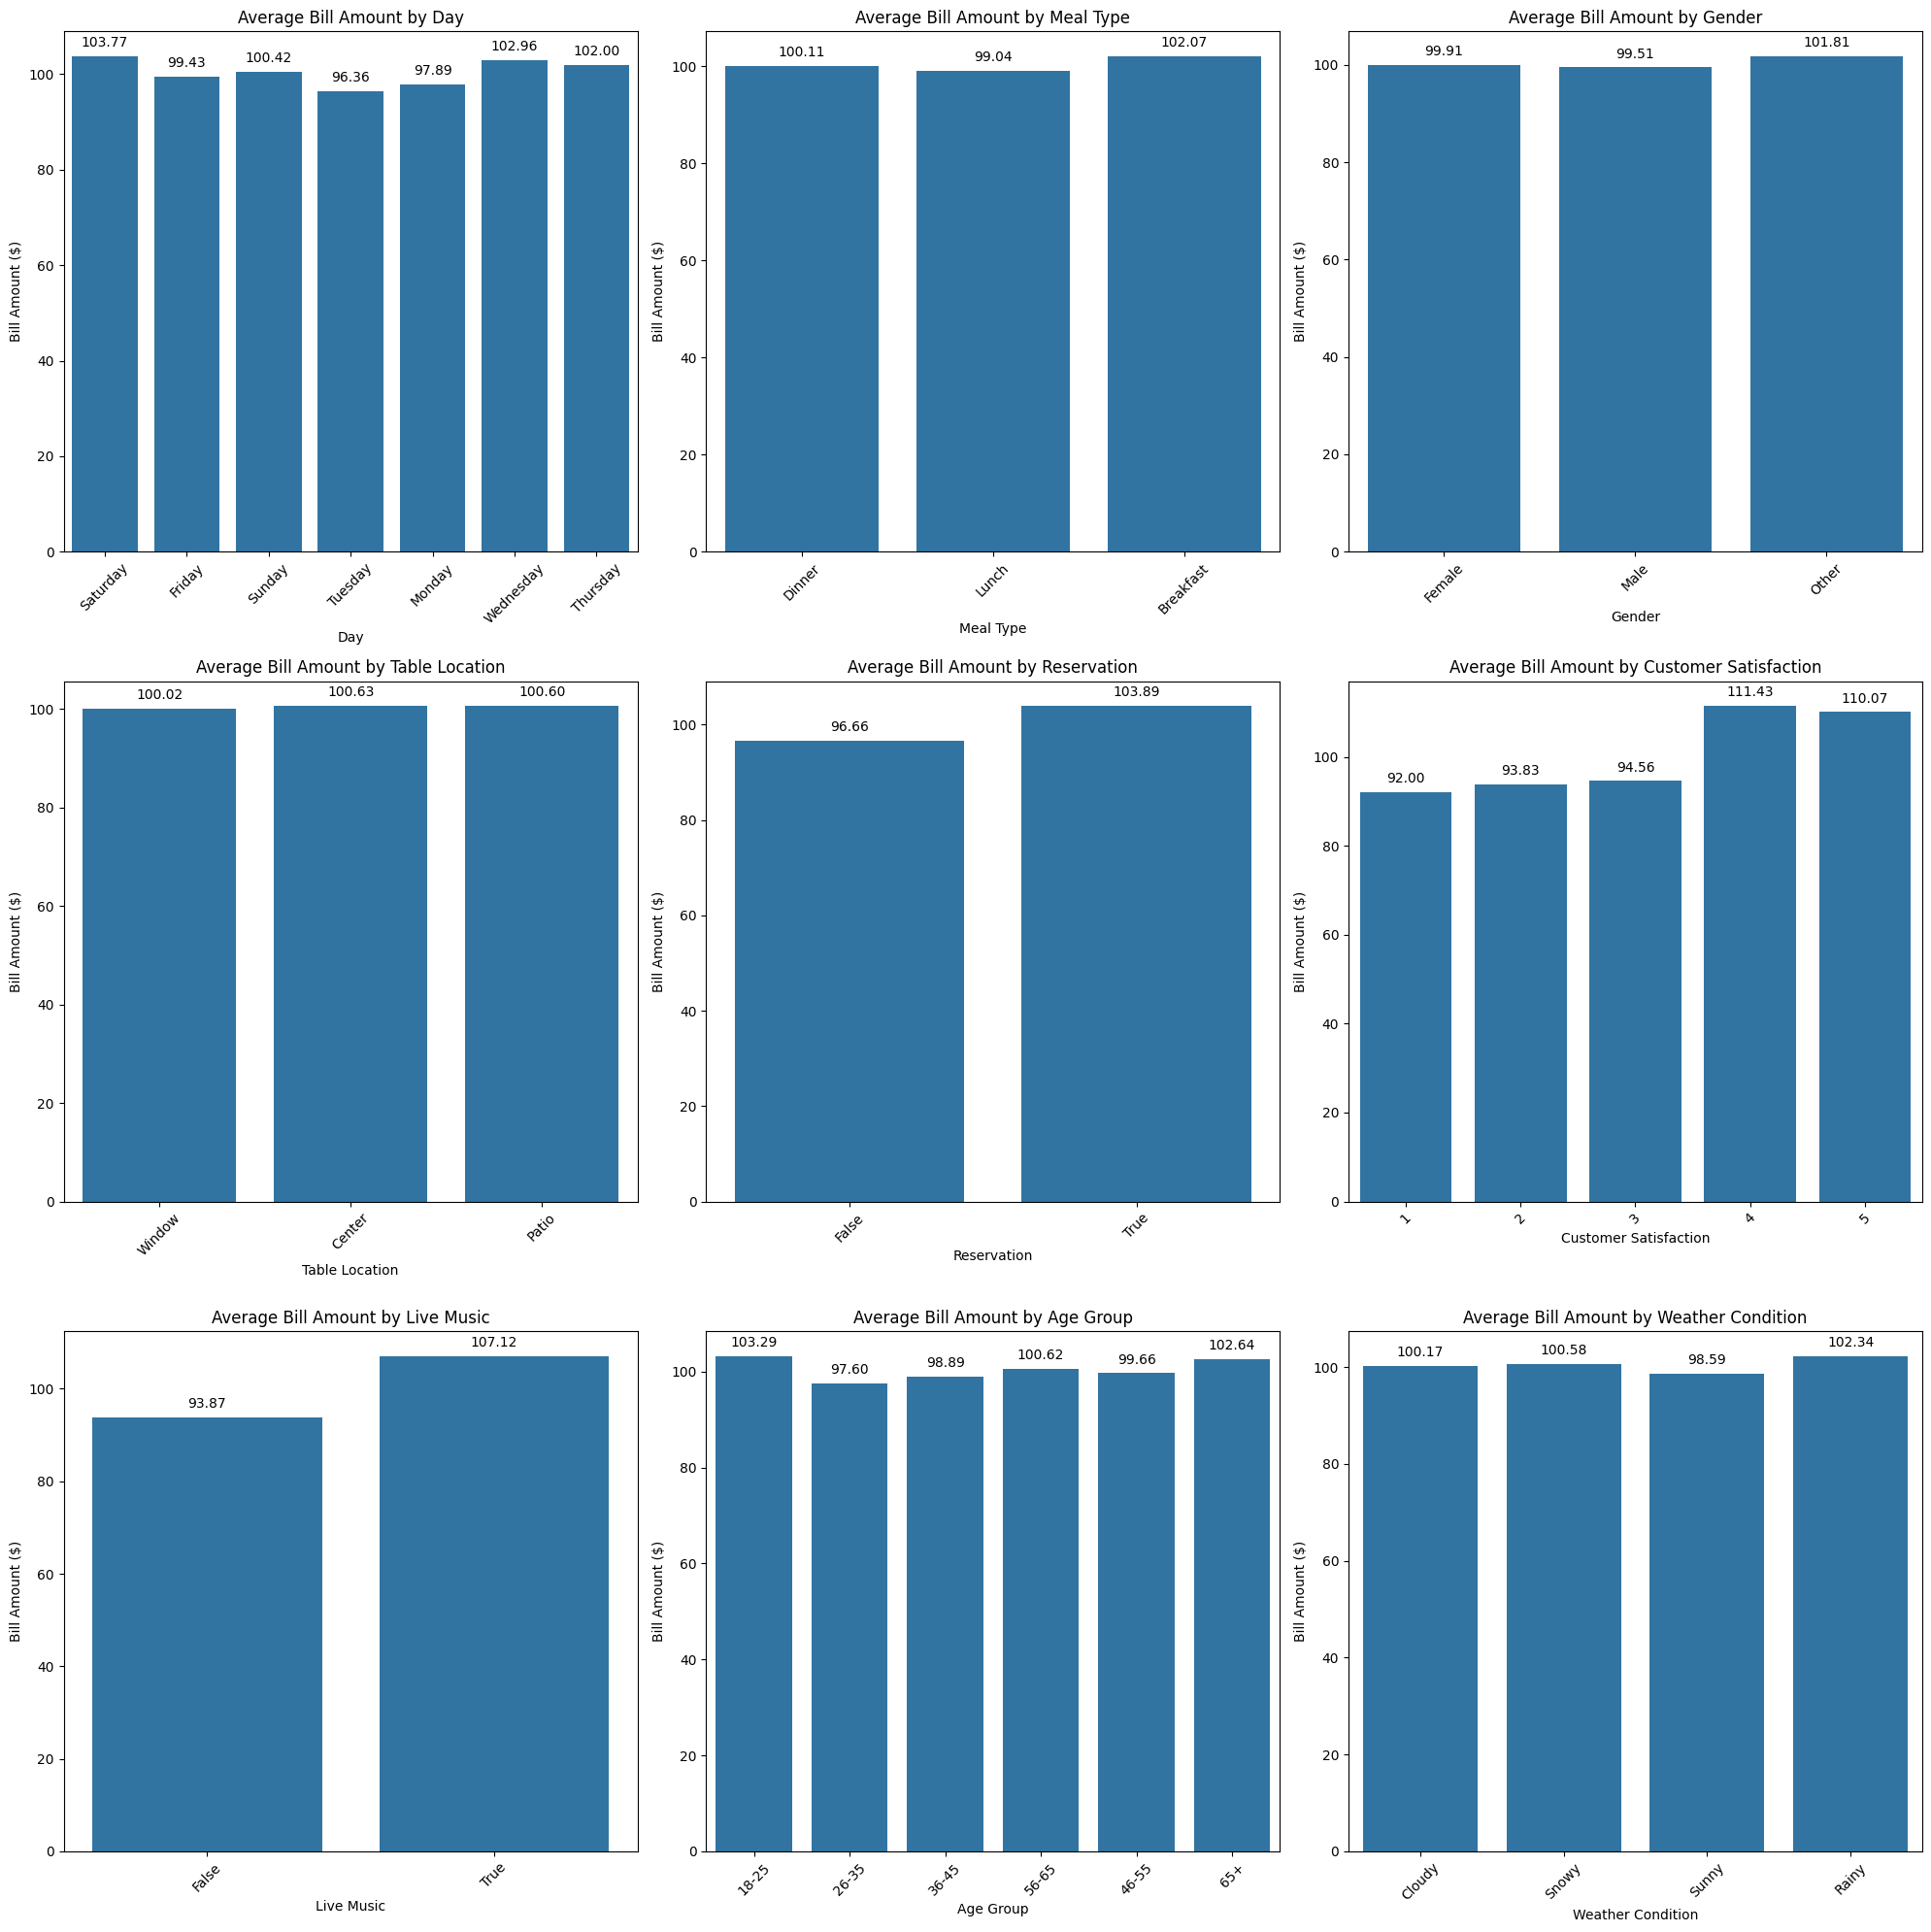

In [15]:
# Amounts paid according to categorical data
# List of categorical columns
categorical_columns = ['Day', 'Meal Type', 'Gender', 'Table Location', 'Reservation', 'Customer Satisfaction', 'Live Music', 'Age Group', 'Weather Condition']

# Creating a bar chart showing the average 'Bill Amount ($)' for each categorical column
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid layout
    barplot = sns.barplot(x=column, y='Bill Amount ($)', data=df, ci=None)  # Confidence interval removed
    plt.title(f'Average Bill Amount by {column}')
    plt.xticks(rotation=45)
    
    # Displaying values on top of the bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')

plt.tight_layout()
plt.show()

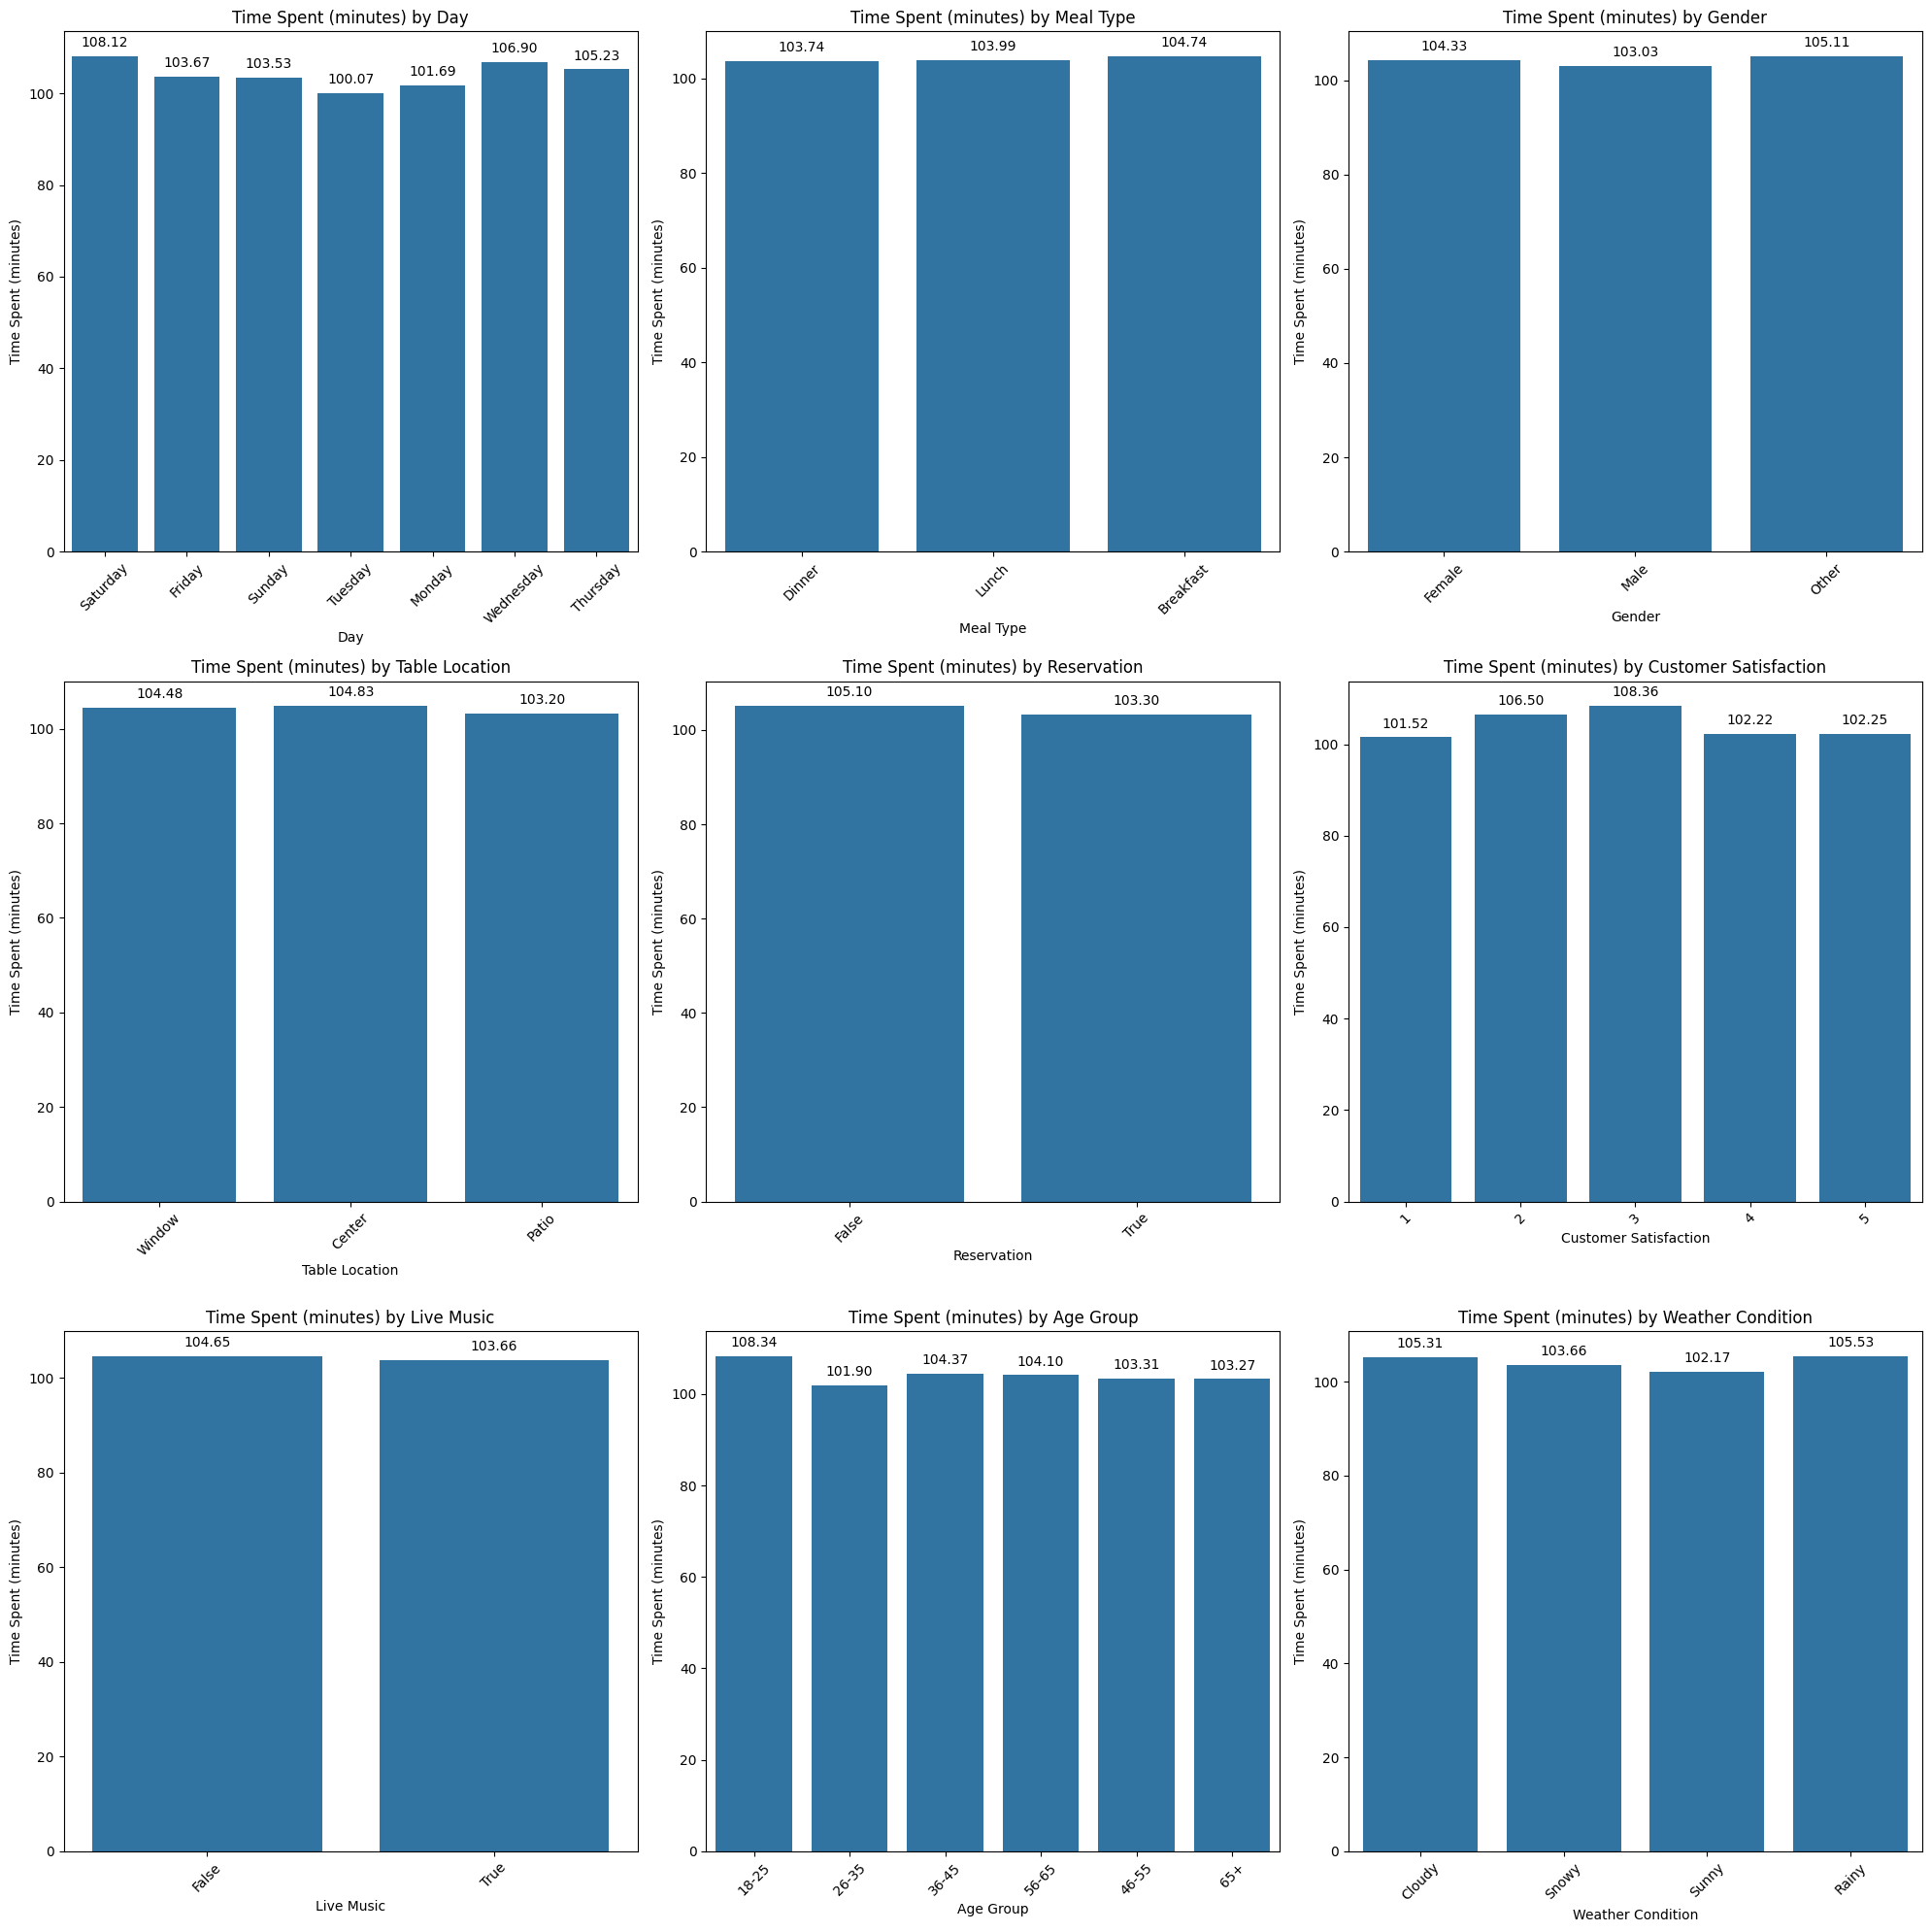

In [16]:
# Amounts of time spent according to categorical data
# List of categorical columns
categorical_columns = ['Day', 'Meal Type', 'Gender', 'Table Location', 'Reservation', 'Customer Satisfaction', 'Live Music', 'Age Group', 'Weather Condition']

# Creating a bar chart showing the average 'Time Spent (minutes)' for each categorical column
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid layout
    barplot = sns.barplot(x=column, y='Time Spent (minutes)', data=df, ci=None)  # Confidence interval removed
    plt.title(f'Time Spent (minutes) by {column}')
    plt.xticks(rotation=45)
    
    # Displaying values on top of the bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')

plt.tight_layout()
plt.show()

### 4.11. Scatterplot

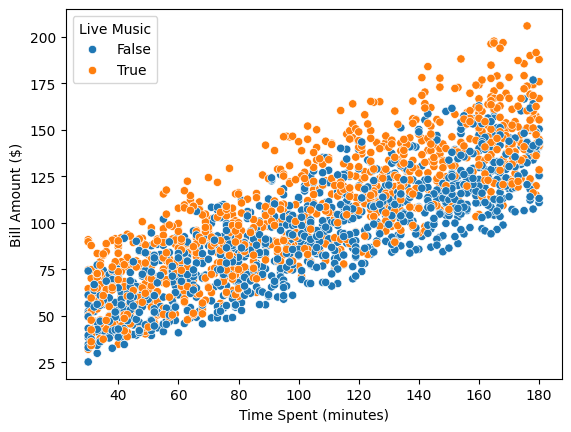

In [17]:
sns.scatterplot(x="Time Spent (minutes)", y= "Bill Amount ($)", data = df, hue = "Live Music");

**Insight:** On days with live music, individuals tend to spend more on their bills.

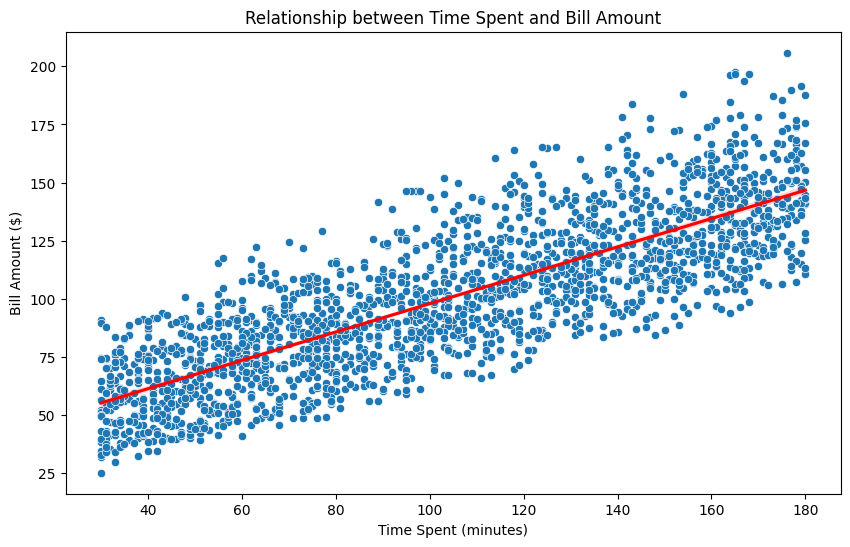

In [18]:
# Time Spent (minutes) ile Bill Amount ($) arasındaki ilişkiyi scatter plot ile inceleme ve eğilim çizgisi ekleme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time Spent (minutes)', y='Bill Amount ($)', data=df)
sns.regplot(x='Time Spent (minutes)', y='Bill Amount ($)', data=df, scatter=False, color='red')  # Kırmızı eğilim çizgisi
plt.title('Relationship between Time Spent and Bill Amount')
plt.show()

**Insight:** As the time spent by customers in the restaurant increases, the amount they spend on their bills also tends to increase.

## 5. Visualization & Explanatory Analysis

### Pertanyaan 1:
Apakah terdapat korelasi antara waktu yang dihabiskan dan jumlah tagihan? Dapatkah visualisasi membantu mengidentifikasi pola-pola tertentu, seperti apakah waktu makan malam cenderung memiliki tagihan yang lebih tinggi?


### Pertanyaan 2:
Bagaimana distribusi kepuasan pelanggan berdasarkan jenis makanan atau lokasi meja? Dapatkah visualisasi membantu menyoroti faktor-faktor tertentu yang berkaitan dengan kepuasan pelanggan?

### 5.1 Deep Learning

#### 5.1.1. Encoding

Untuk mengonversi variabel kategori seperti hari, kondisi cuaca, dll. menjadi nilai numerik dalam kumpulan data.

In [19]:
df.head(2)

,Day,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy


In [20]:
df.columns

Index(['Day', 'Meal Type', 'Number of People', 'Time Spent (minutes)',
       'Bill Amount ($)', 'Gender', 'Table Location', 'Reservation',
       'Customer Satisfaction', 'Live Music', 'Age Group',
       'Weather Condition'],
      dtype='object')

In [21]:
# Applying "One-Hot Encoding" to data where we believe the order is not important
df = pd.get_dummies(df, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first=True)

In [22]:
df.head(2)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,4,62,45.80,2,False,True,True,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [23]:
# Converting boolean data type to integer

for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

simpan pengkodeannya

In [24]:
# Save the encoded dataset as a pickle file
# I did this once initially, and after exporting the encoding process, I read the data from the beginning
# and skipped this part to preserve the entire df. The reason for saving this is to be able to encode new data
# during the prediction stage. Since the new incoming data won't have the "Bill Amount ($)" data, 
# I dropped it and saved the encoded version.
"""df.drop(["Bill Amount ($)"], axis=1).to_pickle('encoded_data.pkl')
df.to_pickle('encoded_data.pkl')"""

'df.drop(["Bill Amount ($)"], axis=1).to_pickle(\'encoded_data.pkl\')\ndf.to_pickle(\'encoded_data.pkl\')'

##### Muat Ulang Data dan Siapkan untuk Analisis

Pada baris di atas, kami menghapus "Jumlah Tagihan ($)", tetapi kami memerlukannya untuk analisis. Oleh karena itu, mari kita baca datanya dari awal dan ulangi proses pengkodeannya.

In [25]:
# Let's reload the data
df = pd.read_csv("data/restaurant_data.csv") 

# Drop entry-exit times
df.drop(['Entry Time', 'Exit Time'], axis=1, inplace=True)

# Perform encoding
df = pd.get_dummies(df, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first=True)

# Convert the "Boolean" data type generated during encoding to integer
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

df.head(2)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,4,62,45.80,2,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


#### 5.1.2. Labelling

In [26]:
X = df.drop(["Bill Amount ($)"], axis = 1)
y = df["Bill Amount ($)"]

#### 5.1.3. Split Train & Test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

#### 5.1.4. Scalling the Data

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [29]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 5.1.5. Membuat Model 

##### 5.1.5.1. Training Model

In [30]:
X_train.shape

(1600, 25)

In [31]:
# Setting up the DL model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

seed = 101

tf.random.set_seed(seed)  # Ensures reproducibility by generating random numbers around a certain seed.

model = Sequential()  # We will use a layered, sequential structure.

# 1st Hidden Layer
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # X_train.shape[1] specifies the number of features used.
# model.add(Dropout(0.2))  # Turn off/zero out 20% of neurons for better learning.

# 2nd Hidden Layer
model.add(Dense(32, activation='relu'))  # There will be 32 neurons in the hidden layer.
# model.add(Dropout(0.2))  # Using this led to worse scores.

# 3rd Hidden Layer
model.add(Dense(16, activation='relu'))  # ReLU activation function is commonly used in intermediate layers.
# model.add(Dropout(0.2))

# 4th Hidden Layer
model.add(Dense(8, activation='relu'))  # Reducing the number of neurons towards the end is a best practice.
# model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1))  # For regression, Dense should be 1!!!

# Define the optimizer
optimizer = Adam(lr=0.003)  # Default learning rate value is 0.001. This can be set to 0.002 / 0.003. We are using Adam optimizer here, Gradient Descent can also be used.

# Compile the model
model.compile(optimizer='adam', loss='mse')  # This line is correct! For regression analysis, it's important that loss='mse'.

# Early Stop
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=25)  # "patience=25" means wait for 25 epochs, if a better score does not come, stop.
# Patience is usually given as 15, 20, 25, etc.
# mode = "auto" means better when the loss value drops.

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 5.1.5.2. Fit the Model

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 100) # If the epoch is 1000, it takes 20-25 minutes
# validation_split = 0.15 shows how much of the data in the train data we evaluate as validation. Cross-Valuiidation ratio

Epoch 1/100



11/11 [==============================] - 2s 32ms/step - loss: 11039.5195 - val_loss: 10092.9854
Epoch 2/100
 1/11 [=>............................] - ETA: 0s - loss: 10460.3291

11/11 [==============================] - 0s 6ms/step - loss: 10825.5117 - val_loss: 9854.8975
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 10516.5703 - val_loss: 9496.2812
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 10038.9355 - val_loss: 8902.1455
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 9211.8066 - val_loss: 7860.7271
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 7824.9976 - val_loss: 6217.9917
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 5741.5386 - val_loss: 4005.9556
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 3262.3047 - val_loss: 1851.2305
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 1387.5389 - val_loss: 1090.0984
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 1063.6451 - val_loss: 1241.3911
Epoch 11/100
11/11 [==============================] - 0s 6ms/st

##### 5.1.5.3. Model History

In [33]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,11039.519531,10092.985352
1,10825.511719,9854.897461
2,10516.570312,9496.281250
3,10038.935547,8902.145508
4,9211.806641,7860.727051
...,...,...
95,220.809509,251.939880
96,220.219070,253.069885
97,220.428772,250.496552
98,219.962158,255.167648


##### 5.1.5.4. Evaluasi Model

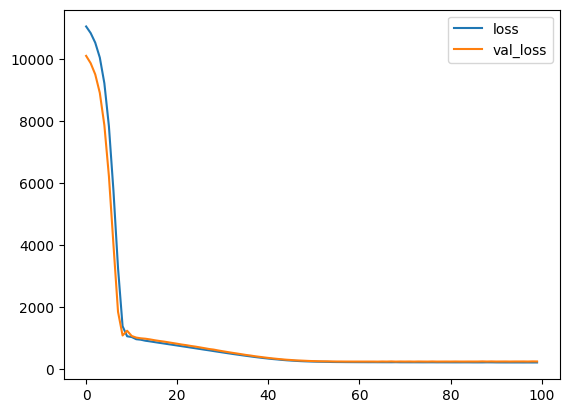

In [34]:
loss_df = pd.DataFrame(model.history.history)# Bu iki egri birbirine yakin olmalidir. 
loss_df.plot();

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [36]:
model.evaluate(X_test, y_test, verbose=0) # Loss amount in the test data

235.63998413085938

In [37]:
y_pred = model.predict(X_test)

13/13 [==============================] - 0s 1ms/step


In [38]:
eval_metric(y_test, y_pred)  # Run the model again without making any changes, the result may improve
# The reason for this is that the weights and biases are randomly selected.
# If ANN acts randomly, it's called "Hallucination," run the model again, it may get better.
# If it still doesn't improve, you can increase the epochs and modify other parameters.

r2_score: 0.7822320204236758 
mae: 12.771242089080811 
mse: 235.63997919749374 
rmse: 15.350569344408491


**Hasil:** Hasil ANN tidak sesuai harapan. Kami akan melanjutkan dengan Machine Learning (ML) tradisional.

### 5.2. Machine Learning

Di sini, 12 metode ML berbeda akan dijalankan secara bersamaan

In [39]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [40]:
ridge=Ridge().fit(X_train, y_train)
lasso=Lasso().fit(X_train, y_train)
enet=ElasticNet().fit(X_train, y_train)
knn=KNeighborsRegressor().fit(X_train, y_train)
ada=AdaBoostRegressor().fit(X_train, y_train)
svm=SVR().fit(X_train, y_train)
dtc=DecisionTreeRegressor().fit(X_train, y_train)
rf=RandomForestRegressor().fit(X_train, y_train)
xgb=XGBRegressor().fit(X_train, y_train)
gbm=GradientBoostingRegressor().fit(X_train, y_train)
lgb=LGBMRegressor().fit(X_train, y_train) # LightGBM
catbost=CatBoostRegressor().fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 25
[LightGBM] [Info] Start training from score 99.886450
Learning rate set to 0.044099
0:	learn: 31.8021800	total: 134ms	remaining: 2m 13s
1:	learn: 30.9523363	total: 136ms	remaining: 1m 7s
2:	learn: 30.0158558	total: 137ms	remaining: 45.6s
3:	learn: 29.1401388	total: 139ms	remaining: 34.6s
4:	learn: 28.3976199	total: 140ms	remaining: 27.9s
5:	learn: 27.6787546	total: 142ms	remaining: 23.5s
6:	learn: 26.9612781	total: 144ms	remaining: 20.4s
7:	learn: 26.2788826	total: 146ms	remaining: 18.1s
8:	learn: 25.6592303	total: 147ms	remaining: 16.2s
9:	learn: 25.1050119	total: 149ms	remaining: 14.7s
10:	learn: 24.4702296	total: 150ms	remaining: 13.5s
11

#### 5.2.1. Get Scores for the Training Data

In [41]:
models=[ridge,lasso,enet,knn,ada,svm,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    r2_score=models.score(X_train, y_train)
    return r2_score

In [42]:
for i in models:
     print(i,"Algorithm succed rate :", ML("Bill Amount ($)",i))

Ridge() Algorithm succed rate : 0.7808012997993505
Lasso() Algorithm succed rate : 0.750154463465404
ElasticNet() Algorithm succed rate : 0.20606807664785287
KNeighborsRegressor() Algorithm succed rate : 0.46020956091072973
AdaBoostRegressor() Algorithm succed rate : 0.8020808409982806
SVR() Algorithm succed rate : 0.38245379608973706
DecisionTreeRegressor() Algorithm succed rate : 1.0
RandomForestRegressor() Algorithm succed rate : 0.9694947103225965
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,


#### 5.2.2. Get Scores for the Test Data

In [43]:
# We will get scores for the test data;
def ML(y, models):
    r2_score = models.score(X_test, y_test)
    return r2_score

In [44]:
for i in models:
     print(i,"Algorithm succed rate :",ML("Bill Amount ($)",i))

Ridge() Algorithm succed rate : 0.7844086438909659
Lasso() Algorithm succed rate : 0.752490274008902
ElasticNet() Algorithm succed rate : 0.20670346078050006
KNeighborsRegressor() Algorithm succed rate : 0.12607983552083524
AdaBoostRegressor() Algorithm succed rate : 0.8008839999076967
SVR() Algorithm succed rate : 0.35814245740222506
DecisionTreeRegressor() Algorithm succed rate : 0.5775320627911226
RandomForestRegressor() Algorithm succed rate : 0.780239684410943
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

**Komentar:** Keberhasilan metode "DecisionTreeRegressor", "XGBRegressor", dan "GradientBoostingRegressor" sangat tinggi pada data pelatihan namun menurun pada data pengujian. Hal ini menunjukkan adanya overfitting. Untuk mengatasinya mari kita lakukan GridSearchCV.

#### 5.2.3. Determine Optimal Hyperparameters with GridSearchCV

##### 5.2.3.1. Perform GridSearchCV for DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2", None]
}

# Create the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=101)

# Create the GridSearchCV object
grid_dt_model = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=10, n_jobs=-1)

# Train the model
grid_dt_model.fit(X_train, y_train)

# Print the best score and parameters
print("Best Score:", grid_dt_model.best_score_)
print("Best Parameters:", grid_dt_model.best_params_)

Best Score: 0.77081479548352
Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
best_grid_model = grid_dt_model.best_estimator_

Best Score: 0.77081479548352

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

##### 5.2.3.2. Perform GridSearchCV for XGBoostRegressor

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [100, 300, 500], 'max_depth': [3, 5, 6, 7], "learning_rate": [0.05, 0.1, 0.2],
              "subsample": [0.5, 1], "colsample_bytree": [0.5, 1]}

xgb_model = XGBRegressor(booster='gblinear', random_state=101, silent=True, objective="reg:squarederror")
grid_xgb_model = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, n_jobs=-1)

# Train the model
grid_xgb_model.fit(X_train, y_train)

# Print the best score and parameters
print("Best Score:", grid_xgb_model.best_score_)
print("Best Parameters:", grid_xgb_model.best_params_)

Best Score: 0.7696270883510477
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


Best Score: 0.7696271078817388

Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [48]:
best_XGB_grid_model=grid_xgb_model.best_estimator_

### 5.3. Final Model

Model akhir menggunakan semua data.

In [50]:
# To avoid any mistakes, we start by reading the data again and performing the encoding process

# Let's read the data again;
df = pd.read_csv("data/restaurant_data.csv") 

# Drop entry and exit times
df.drop(['Entry Time', 'Exit Time'], axis=1, inplace=True)

# Perform encoding
df = pd.get_dummies(df, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first=True)

# Convert the "Boolean" data type generated in encoding to integer
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
df.head(2)


,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,4,62,45.80,2,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


#### 5.3.1. Labelling

In [51]:
X = df.drop(["Bill Amount ($)"], axis = 1)
y = df["Bill Amount ($)"]

#### 5.3.2. Scaling

In [52]:
# Let's import the libraries we will use in the scaling process
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()


In [53]:
X= scaler.fit_transform(X)

In [54]:
# Let's save the scaler externally. Because in Streamlit, when predicting new data with the Final models, we will need to scale them with the scales we used.
import pickle
pickle.dump(scaler, open("final_scaler_saved.pkl", 'wb'))  # write binary

#### 5.3.3. Final DT Model

In [55]:
# Let's predict the final DT model using the optimal hyperparameters we defined above and the entire data set
from sklearn.tree import DecisionTreeRegressor
final_DT_model = DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=1, min_samples_split=2).fit(X, y)

##### 5.3.3.1. Menyimpan Model

**IMPORTANT: ML models need to be saved using joblib or pickle.**

**Save with pickle**
import pickle
pickle.dump(final_DT_model, open("final_DT_model.pkl", 'wb'))

**Alternatively (both do the same operation)**
with open('final_DT_model.pkl', 'wb') as file:
    pickle.dump(final_DT_model, file)

**Load the model saved with pickle**
with open('final_DT_model.pkl', "rb") as file:
    loaded_DT_model = pickle.load(file)

**----------------------------------------**

**Save with joblib**
from joblib import dump
dump(final_DT_model, 'final_DT_model.joblib')

**Load the model saved with joblib**
from joblib import load
loaded_DT_model_joblib = load('final_DT_model.joblib')

**----------------------------------------**

**DL models (Keras-Tensorflow) should be saved as h5 or keras!**

**Save as h5**
final_DT_model.save("final_DT_model.h5")

**Load the model saved as h5**
from tensorflow.keras.models import load_model
loaded_DT_model_h5 = load_model("final_DT_model.h5")

**----------------------------------------**

**Save as Keras**
final_DT_model.save("final_DT_model.keras")

**Load the model saved as Keras**
from tensorflow.keras.models import load_model
loaded_DT_model_keras = load_model("final_DT_model.keras")


In [56]:
# Save the Final DT model
import pickle
pickle.dump(final_DT_model, open("final_DT_model.pkl", 'wb'))

In [57]:
# #from joblib import dump (This is another way, but we haven't used it for now)

# Save your model
#dump(final_DT_model, 'final_DT_model.joblib')

##### 5.3.3.2. SHAP

In [58]:
import shap

explainer = shap.Explainer(final_DT_model.predict, X)
shap_values = explainer(X)

PermutationExplainer explainer: 2001it [00:18, 64.38it/s]                           


In [59]:
df_features= df.drop('Bill Amount ($)', axis = 1)
df_features.head(2)

,Number of People,Time Spent (minutes),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,Day_Sunday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,4,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,4,62,2,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


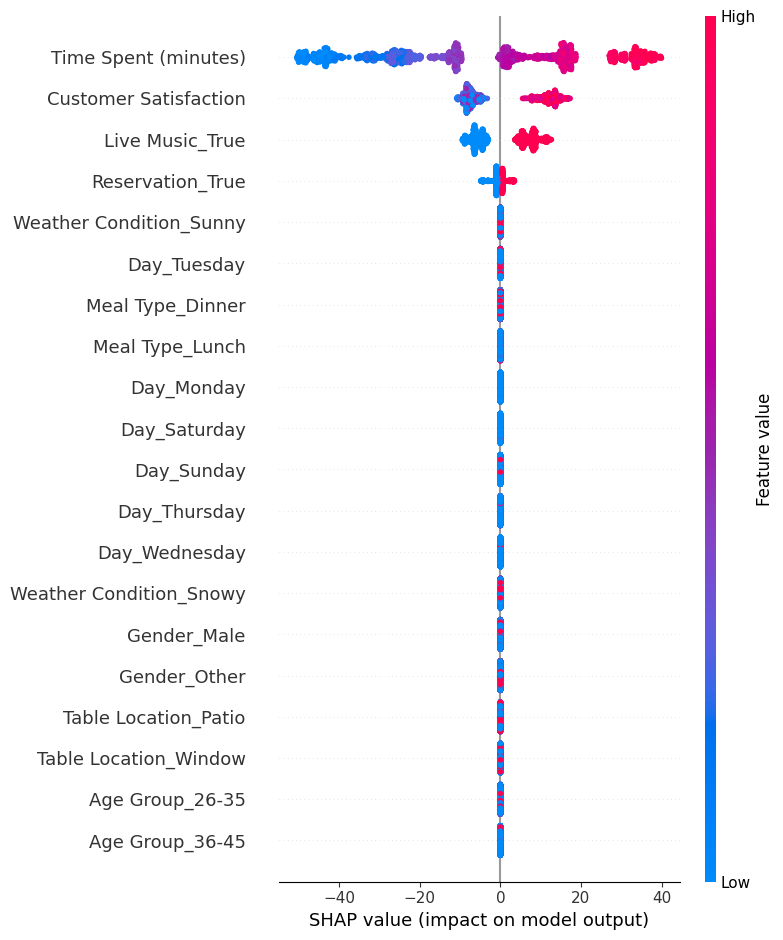

In [60]:
shap.summary_plot(shap_values, features=X, feature_names=df_features.columns)

**SHAP (SHapley Additive exPlanations)** analysis is used particularly for interpreting predictions of machine learning models, such as decision trees. SHAP values quantify the contribution and importance of each feature to a prediction in a numerical manner. When interpreting the resulting SHAP analysis graph, consider the following key points:

**Importance of Features:** SHAP values illustrate the magnitude of each feature's contribution to the model prediction. Features in your graph are arranged based on their contributions. The feature at the top is generally the one that has the largest impact on model predictions.

**Positive and Negative Effects:** The SHAP values of each feature indicate whether that feature has a positive or negative effect on the prediction. Positive values indicate that the feature increases the prediction (e.g., directing towards the positive class in a classification model), while negative values indicate a decrease in the prediction (directing towards the negative class).

**Value Distribution:** By examining the distribution of SHAP values for each feature, you can understand how your model responds to different feature values. A wide distribution indicates that the model exhibits significant variations for different values of that feature.

**Coloring:** SHAP graphs often use coloring for each feature value. This signifies the direction of the effect of feature values on predictions. For instance, red may indicate positive effects when high values contribute positively, while blue may indicate positive effects when low values contribute positively.

**Interactions:** Some SHAP graphs also display interactions between features, showing how two features together impact the model. This helps you understand the joint effect of two features on the model.

SHAP analysis assists in understanding which features are crucial for your model and how these features contribute to predictions. This information can be utilized to enhance model performance, make feature selections, or explain model decisions to end-users.

**KOMENTAR:** Jumlah yang akan dibayarkan pelanggan dipengaruhi secara signifikan oleh "pengeluaran waktu", dengan dampak positif jika tinggi dan dampak negatif jika rendah. Dampak negatif dari rendahnya waktu yang dihabiskan lebih terasa. Oleh karena itu, upaya harus dilakukan untuk mendorong pelanggan menghabiskan lebih banyak waktu di restoran.

Tingkat “kepuasan pelanggan” yang tinggi berpengaruh positif dan signifikan terhadap jumlah yang harus dibayar, sedangkan “kepuasan pelanggan” yang rendah mempunyai dampak negatif namun dalam jumlah yang lebih kecil. Pola serupa juga berlaku untuk "musik live".

In [61]:
feature_names=df_features.columns
feature_names

Index(['Number of People', 'Time Spent (minutes)', 'Customer Satisfaction',
       'Live Music_True', 'Reservation_True', 'Meal Type_Dinner',
       'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'Gender_Male',
       'Gender_Other', 'Table Location_Patio', 'Table Location_Window',
       'Age Group_26-35', 'Age Group_36-45', 'Age Group_46-55',
       'Age Group_56-65', 'Age Group_65+', 'Weather Condition_Rainy',
       'Weather Condition_Snowy', 'Weather Condition_Sunny'],
      dtype='object')

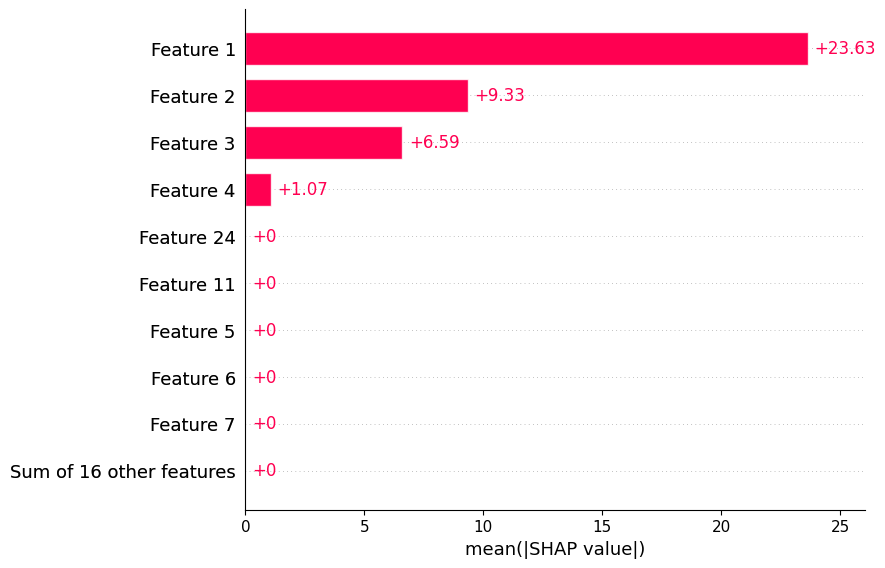

In [62]:
# It shows the absolute values of the effects.

shap.plots.bar(shap_values)

In [63]:
y.value_counts().sum() # will display the total number of people.

2000

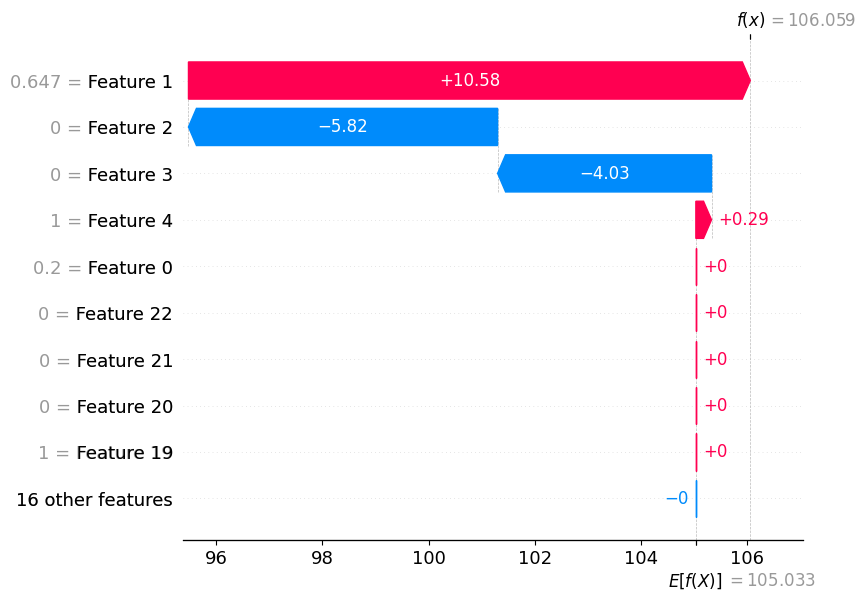

In [64]:
shap.plots.waterfall(shap_values[1999])
# Here, entering one less than the number of observations is intended to use their index numbers. 
# While there are 2000 people, the index number of the 2000th person is 1999. 
# The waterfall plot below will provide information about the person with the index number 1999 in the list.

In [65]:
df.columns

Index(['Number of People', 'Time Spent (minutes)', 'Bill Amount ($)',
       'Customer Satisfaction', 'Live Music_True', 'Reservation_True',
       'Meal Type_Dinner', 'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Gender_Male', 'Gender_Other', 'Table Location_Patio',
       'Table Location_Window', 'Age Group_26-35', 'Age Group_36-45',
       'Age Group_46-55', 'Age Group_56-65', 'Age Group_65+',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny'],
      dtype='object')

**KOMENTAR:** Warna biru menunjukkan efek negatif, warna merah menunjukkan efek positif.
**Faktor yang secara positif mempengaruhi jumlah pelanggan yang paling banyak membayar adalah 'Waktu yang Dihabiskan (menit)', sedangkan rendahnya kepuasan pelanggan dan sedikitnya jumlah orang dalam grup berpengaruh negatif terhadap jumlah tagihan.**

##### 5.3.3.3. Feature Importance

In [66]:
df_f_i = pd.DataFrame(index=df_features.columns, data = final_DT_model.feature_importances_,
                     columns = ["feature Importance"]).sort_values("feature Importance")
df_f_i

,feature Importance
Number of People,0.000000
Weather Condition_Rainy,0.000000
Age Group_65+,0.000000
Age Group_56-65,0.000000
Age Group_46-55,0.000000
Age Group_36-45,0.000000
Age Group_26-35,0.000000
Table Location_Window,0.000000
Table Location_Patio,0.000000
Gender_Other,0.000000


In [67]:
final_DT_model.feature_importances_

array([0.        , 0.8306512 , 0.1035115 , 0.05938688, 0.00645041,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

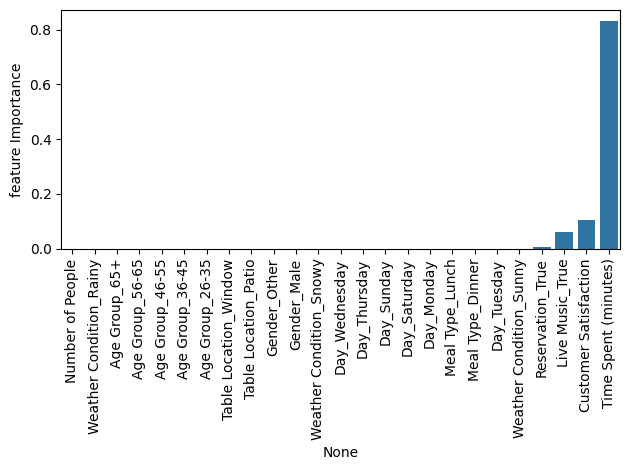

In [68]:
sns.barplot(x=df_f_i.index, y = "feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

#### 5.3.4. Final XGB Model

In [69]:
# Let's predict the final XGB model using the optimum hyperparameters we specified above and the entire dataset;
from xgboost import XGBRegressor
final_XGB_model = XGBRegressor(colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5).fit(X, y)

##### 5.3.4.1. Save the Final XGB Model

In [70]:
# Save the final XGB model
import pickle
pickle.dump(final_XGB_model, open("final_XGB_model.pkl", 'wb'))

In [71]:
#from joblib import dump

# Save your model
#dump(final_XGB_model, 'final_XGB_model.joblib')

##### 5.3.4.2. SHAP

In [72]:
import shap
explainer = shap.Explainer(final_XGB_model.predict, X)
shap_values = explainer(X)

PermutationExplainer explainer: 2001it [01:26, 20.48it/s]                          


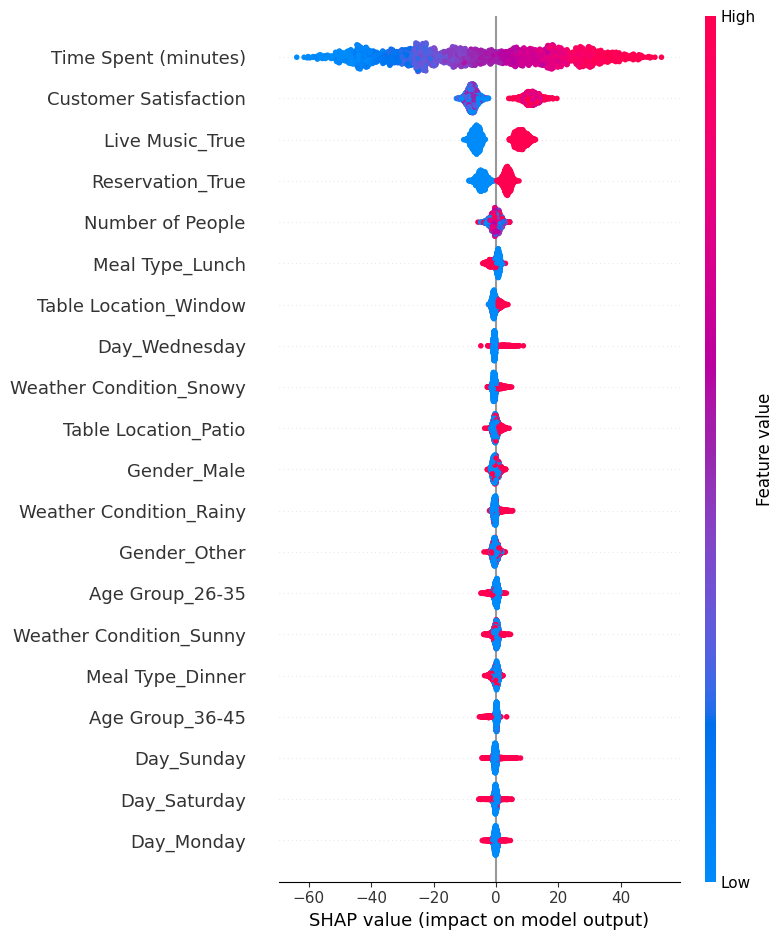

In [73]:
shap.summary_plot(shap_values, features=X, feature_names=df_features.columns)

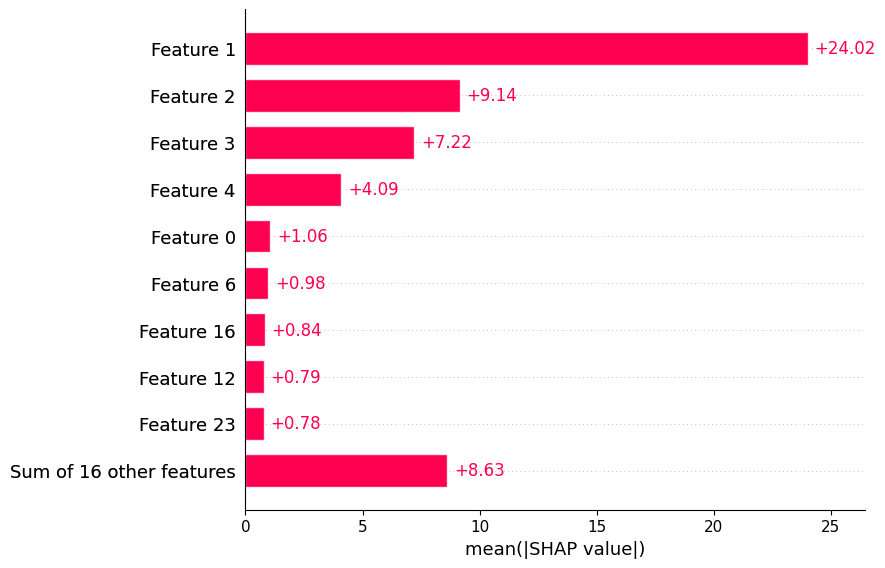

In [74]:
# Display the absolute values of the effects.
shap.plots.bar(shap_values)

In [75]:
y.value_counts().sum()  # Show the number of individuals in the analysis.

2000

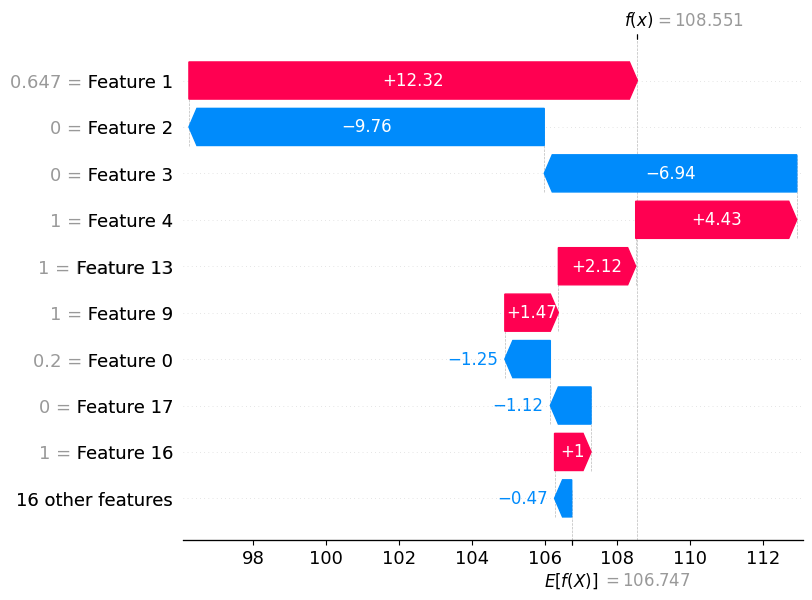

In [76]:
shap.plots.waterfall(shap_values[1999]) 
# Here, the purpose of entering one less than the number of observations is to use their index numbers.
# When there are 2000 individuals, the index number of the 2000th individual is 1999.
# The following plot will generate information about the individual with index number 1999 in the list.

In [77]:
df.columns

Index(['Number of People', 'Time Spent (minutes)', 'Bill Amount ($)',
       'Customer Satisfaction', 'Live Music_True', 'Reservation_True',
       'Meal Type_Dinner', 'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Gender_Male', 'Gender_Other', 'Table Location_Patio',
       'Table Location_Window', 'Age Group_26-35', 'Age Group_36-45',
       'Age Group_46-55', 'Age Group_56-65', 'Age Group_65+',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny'],
      dtype='object')

**KOMENTAR:** Faktor yang paling berpengaruh positif terhadap jumlah yang harus dibayar adalah 'Waktu yang Dihabiskan (menit)' dengan nomor indeks 1.

**Faktor dengan indeks nomor 3, 'Kepuasan Pelanggan', dapat mempengaruhi besarannya baik secara positif maupun negatif. Dengan kata lain, ini berarti bahwa akun akan terkena dampak negatif ketika 'Kepuasan Pelanggan' rendah dan terkena dampak positif ketika 'Kepuasan Pelanggan' tinggi.**

**Meskipun faktor dengan indeks nomor 4, 'Live Music_True,' tampaknya tidak memiliki dampak yang signifikan dalam Pohon Keputusan (DT), faktor tersebut diamati memiliki pengaruh positif terhadap jumlah di XGBoost (XGB).**

##### 5.3.4.3. Feature Importance

In [78]:
df_f_i = pd.DataFrame(index=df_features.columns, data = final_XGB_model.feature_importances_,
                     columns = ["feature Importance"]).sort_values("feature Importance")
df_f_i

,feature Importance
Meal Type_Dinner,0.022546
Age Group_65+,0.022746
Day_Thursday,0.023004
Meal Type_Lunch,0.023617
Age Group_36-45,0.023849
Table Location_Window,0.023947
Gender_Other,0.024077
Gender_Male,0.024510
Table Location_Patio,0.024879
Day_Tuesday,0.024998


In [79]:
final_XGB_model.feature_importances_

array([0.02682705, 0.20019794, 0.07974221, 0.11384422, 0.05869201,
       0.02254557, 0.02361693, 0.02617046, 0.02738176, 0.02519309,
       0.02300352, 0.02499832, 0.03136378, 0.02451029, 0.02407667,
       0.02487881, 0.02394694, 0.03080931, 0.02384935, 0.03196214,
       0.02522784, 0.0227463 , 0.02699927, 0.02908223, 0.0283339 ],
      dtype=float32)

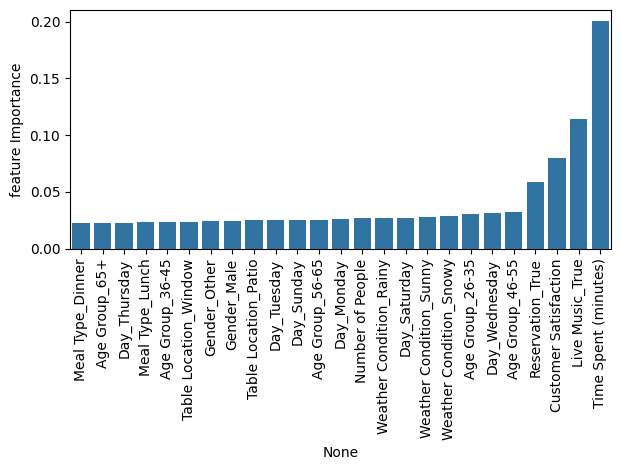

In [80]:
sns.barplot(x=df_f_i.index, y = "feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

**KOMENTAR:** Berdasarkan grafik ini, **variabel yang paling mempengaruhi jumlah yang harus dibayar di XGBoost (XGB) adalah, secara berurutan: waktu yang dihabiskan di restoran, keberadaan musik live, kepuasan pelanggan, dan adanya reservasi. Sementara itu, dalam Decision Trees (DT), faktor-faktor lain yang tampaknya tidak penting masih mempunyai pengaruh yang kecil terhadap jumlah yang harus dibayarkan.**

#### 5.3.5. Final ANN Model

In [81]:
# Setting up the DL model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

seed = 101

tf.random.set_seed(seed)  # Setting a seed for reproducibility of random number generation.

ANN_model = Sequential()  # Using a layered, sequential structure for the model.

# 1. Hidden Layer
ANN_model.add(Dense(32, input_dim=X.shape[1], activation='relu'))  # 'X.shape[1]' specifies the number of features used.
# ANN_model.add(Dropout(0.2))  # Turn off 20% to enhance learning.

# 2. Hidden Layer
ANN_model.add(Dense(32, activation='relu'))  # 32 neurons in the hidden layer.
# ANN_model.add(Dropout(0.2))  # Using dropout deteriorated the scores.

# 3. Hidden Layer
ANN_model.add(Dense(16, activation='relu'))  # ReLU activation function is commonly used in intermediate layers.
# ANN_model.add(Dropout(0.2))

# 4. Hidden Layer
ANN_model.add(Dense(8, activation='relu'))  # Reducing the number of neurons towards the end is a best practice.
# ANN_model.add(Dropout(0.2))

# Output Layer
ANN_model.add(Dense(1))  # For regression, 'Dense' should be 1!!!

# Define the optimizer
optimizer = Adam(lr=0.003)  # Default learning rate is 0.001. Can be set to 0.002 / 0.003. Using Adam optimizer here.

# Compile the model
ANN_model.compile(optimizer='adam', loss='mse')  # For regression analysis, it's important to have 'loss='mse''. 

# Early Stop
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=25)  # "patience=25" means wait for improvement for 25 epochs.
# 'patience' is usually set to values like 15, 20, 25.
# 'mode="auto"' means better when the loss value decreases.

# Model Summary
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                832       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
ANN_model.fit(x = X, y = y, batch_size = 128, epochs = 2000)

Epoch 1/2000
16/16 [==============================] - 1s 4ms/step - loss: 11192.3408
Epoch 2/2000
16/16 [==============================] - 0s 3ms/step - loss: 11157.8584
Epoch 3/2000
16/16 [==============================] - 0s 3ms/step - loss: 11151.1475
Epoch 4/2000
16/16 [==============================] - 0s 3ms/step - loss: 11146.9541
Epoch 5/2000
16/16 [==============================] - 0s 2ms/step - loss: 11141.9326
Epoch 6/2000
16/16 [==============================] - 0s 3ms/step - loss: 11133.8457
Epoch 7/2000
16/16 [==============================] - 0s 3ms/step - loss: 11112.7676
Epoch 8/2000
16/16 [==============================] - 0s 4ms/step - loss: 11037.5342
Epoch 9/2000
16/16 [==============================] - 0s 3ms/step - loss: 10778.6006
Epoch 10/2000
16/16 [==============================] - 0s 3ms/step - loss: 10030.8984
Epoch 11/2000
16/16 [==============================] - 0s 3ms/step - loss: 8176.0405
Epoch 12/2000
16/16 [==============================] - 0s 3ms/st

In [83]:
# To save the model in the h5 format:
ANN_model.save("final_ANN_model.h5")


In [84]:
# To save the model in the Keras format (not used for now):
# ANN_model.save("final_ANN_model.keras")

##### 5.3.5.1. Eval Metrics

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [86]:
# Scores for Decision Tree (DT)
y_pred = final_DT_model.predict(X)
eval_metric(y, y_pred)


r2_score: 0.8035408652187307 
mae: 12.139308422925085 
mse: 211.51521555218025 
rmse: 14.543562684300579


In [87]:
# scores for XGB
y_pred = final_XGB_model.predict(X)
eval_metric(y, y_pred)

r2_score: 0.9040378943098958 
mae: 8.36851404083252 
mse: 103.3163741277898 
rmse: 10.164466249035893


In [88]:
# scores for ANN
y_pred = ANN_model.predict(X)
eval_metric(y, y_pred)

63/63 [==============================] - 0s 2ms/step
r2_score: 0.9256699939423475 
mae: 6.9142008115005495 
mse: 80.02645064472814 
rmse: 8.945750423789395


**KOMENTAR:** Tampaknya model yang paling sukses adalah model ANN.

### 5.4. Prediction

#### 5.4.1. Loading Scaler and Models 

In [89]:
from tensorflow.keras.models import load_model
import pickle

final_scaler = pickle.load(open("final_scaler_saved.pkl", "rb"))
DT_model = pickle.load(open('final_DT_model.pkl', "rb"))
XGB_model = pickle.load(open('final_XGB_model.pkl', "rb"))
ANN_model = load_model('final_ANN_model.h5')                      

#### 5.4.2. Prediction

Di sini saya menggunakan pengkodean data.

Jika kita akan membaca data dari awal, maka perlu dilakukan proses pengkodean dengan cara membaca ulang **encoded_data.pkl**.

In [90]:
df.head(1)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [91]:
# Let's make an observation from the current data set we have;

Customer_A = df.drop('Bill Amount ($)', axis = 1).iloc[0:1, :]   # We are currently attracting the person with index 0. If we write 2:3, you will attract the customer with index number 2 (3rd place on the list).
Customer_A

,Number of People,Time Spent (minutes),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,Day_Sunday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,4,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [92]:
# Let's apply scaling to this data;
Customer_A_Scaled = final_scaler.transform(Customer_A)
Customer_A_Scaled

array([[0.6 , 0.48, 0.75, 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]])

##### 5.4.2.1. Prediction with DT

In [93]:
DT_model.predict(Customer_A_Scaled)

array([99.91333333])

In [94]:
# Account actually paid
df.iloc[0][2]

117.08

**Komentar:** Pelanggan dengan indeks 0 sebenarnya membayar $117,08. Model DT memperkirakannya sebesar 99,91 USD.

##### 5.4.2.2. Prediction with XGB

In [95]:
XGB_model.predict(Customer_A_Scaled)

array([108.846504], dtype=float32)

**Komentar:** Pelanggan dengan indeks 0 sebenarnya membayar 117,66 USD. Model XGB memperkirakannya seharga 98,8 USD.

##### 5.4.2.3. Prediction with ANN

In [96]:
ANN_model.predict(Customer_A_Scaled)

1/1 [==============================] - 0s 129ms/step


array([[99.82104]], dtype=float32)

**Komentar:** Pelanggan dengan indeks 0 sebenarnya membayar $117,08. Model ANN memperkirakannya pada 104,46 USD.

##### 5.4.2.4. Prediction Using New Observed Values

In [97]:
df.columns

Index(['Number of People', 'Time Spent (minutes)', 'Bill Amount ($)',
       'Customer Satisfaction', 'Live Music_True', 'Reservation_True',
       'Meal Type_Dinner', 'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Gender_Male', 'Gender_Other', 'Table Location_Patio',
       'Table Location_Window', 'Age Group_26-35', 'Age Group_36-45',
       'Age Group_46-55', 'Age Group_56-65', 'Age Group_65+',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny'],
      dtype='object')

In [98]:
data = {
    "Day": ['Monday'],
    "Meal Type": ['Dinner'],
    "Number of People": [2],
    "Time Spent (minutes)": [125],
    "Gender": ['Male'],
    "Table Location": ['Window'],
    "Reservation": [1],
    "Customer Satisfaction": [4],
    "Live Music": [1],
    "Age Group": ['18-25'],
    "Weather Condition": ['Cloudy']
}

# Create a new DataFrame
df_new = pd.DataFrame(data)
df_new

,Day,Meal Type,Number of People,Time Spent (minutes),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Monday,Dinner,2,125,Male,Window,1,4,1,18-25,Cloudy


In [99]:
# WE ARE ENCODING df_new

encoded_data = pd.read_pickle('encoded_data.pkl')

# Apply the same encoding to df_new
df_new_encoded = pd.get_dummies(df_new, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first =True)

# Converting the data type of the converted columns to int
for column in df_new_encoded.columns:
     if df_new_encoded[column].dtype == 'bool':
        df_new_encoded[column] = df_new_encoded[column].astype(int)
        
# Ensure that the columns in df_new_encoded are the same as in the original encoding
# This is important to make sure the order and presence of columns are consistent

df_new_encoded = df_new_encoded.reindex(columns=encoded_data.columns, fill_value=0)
df_new_encoded

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,2,125,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Penjelasan:** Saat melakukan pengkodean, ia memberikan nilai 0 pada data yang dianggap ada di kumpulan data asli tetapi tidak dapat ditemukan di kumpulan data baru.

Kita tahu bahwa "Jumlah Tagihan ($)" bukan 0. Kami bahkan mencoba menebaknya. Jadi mari kita hilangkan kolom ini. Mari kita minta model untuk menemukan nilai ini.

In [100]:
df_new_encoded.drop(['Bill Amount ($)'], axis=1, inplace=True)
df_new_encoded

,Number of People,Time Spent (minutes),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,Day_Sunday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,2,125,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Saat pertama kali menyimpan bagian "encoded_data.pkl"; Karena ini menampilkan musik live dan reservasi sebagai 0, itu mengkodekannya sebagai 0 meskipun kami mengatakan ada musik live dan reservasi.

In [101]:
# SCALING

df_new_encoded_Scaled = final_scaler.transform(df_new_encoded)
df_new_encoded_Scaled

array([[0.2       , 0.63333333, 0.75      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [102]:
DT_model.predict(df_new_encoded_Scaled)

array([114.30901235])

In [103]:
XGB_model.predict(df_new_encoded_Scaled)

array([107.288506], dtype=float32)

In [104]:
ANN_model.predict(df_new_encoded_Scaled)

1/1 [==============================] - 0s 33ms/step


array([[95.20547]], dtype=float32)

**KOMENTAR:** Pelanggan ini diharapkan membayar 89,1 USD pada akun sesuai dengan model ANN.

## Conclusion

- Berdasarkan analisis, terlihat bahwa waktu yang dihabiskan memiliki korelasi positif dengan jumlah tagihan. Oleh karena itu, strategi untuk meningkatkan waktu tinggal pelanggan mungkin dapat berdampak positif pada pendapatan restoran.

- Dari hasil analisis, jenis makanan dan lokasi meja mungkin memiliki pengaruh signifikan pada kepuasan pelanggan. Restoran dapat mempertimbangkan untuk mengoptimalkan pengalaman pelanggan dengan menyesuaikan penawaran makanan atau mengelola tata letak meja.